# Taylor Method

Problem : $\hspace{1cm} {\Large\dot{x}(t) = f(x(t), t)\hspace{1cm}}with \hspace{5mm}{\large x(t_0) = x_0}$

Lets expand each side with Taylor Expansion

${\large \dot{x}(t_i+h) = x_{[1]}(t_i)+x_{[2]}(t_i)h+x_{[3]}(t_i)h^2+...}$

${\large f(t_i+h) = f_{[0]}(t_i)+f_{[1]}(t_i)h+f_{[2]}(t_i)h^2+...}$

Note That $f_{[n]} = \frac{f^{(n)}}{n!}$


We recursively get $x_{[n]}$, using the recurrence relationship


### However, this method is not widely use because we need to compute all the derivatives of function f

For example, if $f = x^3t+t+x^2$, we need to compute each 

First derivative,   $f' = x^3+3x^2x't+2xx'+1$

Second derivative, $f'' = 3x^2x'+6xt(x')^2+3x^2x'+3x^2tx''+2(x')^2+2xx''$

#### Usual solution : 

1. Do it by hands
2. Use Automatic differentiation

#### However we can also solve this problem by using TaylorSeries.jl, since it is possible to compute(numerically) the function which takes Taylor Series as an input

Unfortunatly, TaylorIntegration.jl was released 7 days ago, which is the same solver we tried.

https://github.com/PerezHz/TaylorIntegration.jl/blob/master/src/explicitode.jl

## Test ODE - Lorenz System
$\\$

$$\dot{x} = \sigma (y-x),$$
$$\dot{y} = x(\rho-z)-y,$$
$$\dot{z} = xy-\beta z$$

where $\beta, \sigma, \rho$ are fixed constants

In this application we will use $$(\beta, \rho, \sigma) = (\frac{8}{3}, 28, 10)$$ which was used by Lorenz in his first paper


In [1]:
using TaylorSeries
using TaylorIntegration
using PyPlot

In [2]:
const β=8/3
const ρ=28
const σ=10
X0 = [1.0, 1.0, 1.0]
t0 = 0.0
tf = 100.0
tol = 10.0^(-20)
steps = 10000
order = 20

20

In [3]:
function lorenz_system(t, x)
    return [σ*(x[2]-x[1]), x[1]*(ρ-x[3])-x[2], x[1]*x[2]-β*x[3]]
end

lorenz_system (generic function with 1 method)

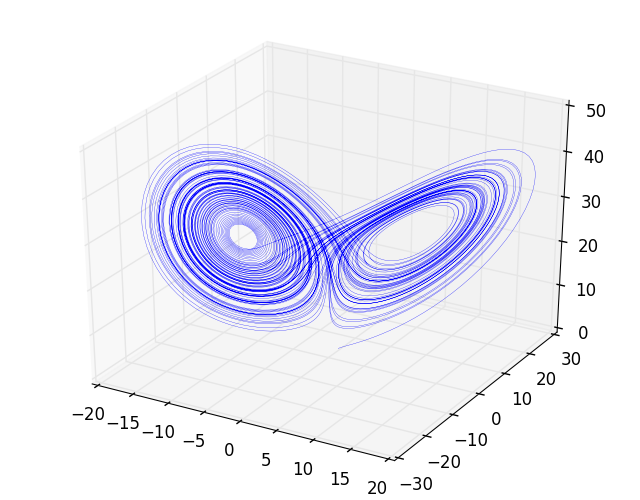

1-element Array{Any,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x32104a588>

In [4]:
t, X = taylorinteg(lorenz_system, X0, t0, tf, 10, 10.0^-10, maxsteps = steps);
x, y, z = view(X, :, 1), view(X, :, 2), view(X, :, 3)
PyPlot.plot3D(x, y, z, linewidth=0.2)

## Compare with ODE.jl

In [5]:
function problem2(t, x)
    -2*x+t+4.0
end

problem2 (generic function with 1 method)

In [6]:
realx = t->-0.75*exp(-2*t)+0.5*t+1.75

(::#1) (generic function with 1 method)

In [7]:
tval1, xval1 = taylorinteg(problem2, 1.0, 0.0, 10.0, 8, 10.0^-36, maxsteps=10^6);

In [8]:
print("Error on x(10) : ")
print(abs(xval1[end]-realx(tval1[end])))

Error on x(10) : 3.7066351064041214e-6

In [15]:
using ODE
t = 0:0.00001:10
tval2, xval2 = ode23(problem2, 0.0, t);

In [16]:
print("Error on x(10) : ")
print(abs(xval2[end]-realx(tval2[end])))

Error on x(10) : 8.016748735961698e-6

### So we can appropriately adjust order and absolute tolerance to get more accurate solution